In [10]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem
import pandas as pd
from matplotlib import pyplot as plt
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem

In [11]:
from mt_dnn import *
model = ANN(fingerprints_size = 1024,
                fingerprints_hidden_size = 132,
                num_layers = 7,
                n_tasks = 4)
earlystop = EarlyStopping(filename="E:/mt-dnn/fold_save/best_model/0_43_7_132_3.17_4.5.pth")
earlystop.load_checkpoint(model)

In [12]:
from train_mt import *
from dataset import FingerPrintsDataset
name = "test_ECFP.csv"
test_dataset = FingerPrintsDataset("E:/mt-dnn/csv", name)
batch_size = 500
num_workers = 2
test_dataloader = DataLoaderX(test_dataset, batch_size, shuffle=False, num_workers=num_workers,
                              collate_fn=collate_fn)
test_probe = []
test_pred = []
for i in range(5):
  model = ANN(fingerprints_size = 1024,
                  fingerprints_hidden_size = 132,
                  num_layers = 7,
                  n_tasks = 4)
  earlystop = EarlyStopping(filename="E:/mt-dnn/fold_save/best_model/{}_43_7_132_3.17_4.5.pth".format(i))
  earlystop.load_checkpoint(model)
  test_true, test_probe = run_a_eval_epoch(model, test_dataloader)

# metrics

  test_true = np.around(np.concatenate(np.array(test_true), 0), 1).flatten()
  test_probe = np.concatenate(np.array(test_probe), 0).flatten()
  test_pred = np.around(test_probe, 0).flatten()
  test_true = test_true[3::4]
  test_probe = test_probe[3::4]
  test_pred = test_pred[3::4]


  test_probe = [test_probe[i] for i in range(len(test_probe)) if test_true[i] != 0.5]
  test_pred = [test_pred[i] for i in range(len(test_pred)) if test_true[i] != 0.5]
  test_true = [test_true[i] for i in range(len(test_true)) if test_true[i] != 0.5]
  

  test_accuracy, test_sens, test_spec, test_auc, test_mcc = balanced_accuracy_score(test_true, test_pred), \
                                                recall_score(test_true, test_pred), \
                                                recall_score(test_true, test_pred, pos_label=0), \
                                                roc_auc_score(test_true, test_probe), \
                                                matthews_corrcoef(test_true, test_pred)

  print("test_accuracy:%.4f \t test_sens:%.4f \t test_spec:%.4f \t test_auc:%.4f \t test_mcc:%.4f" % (test_accuracy, test_sens, test_spec, test_auc, test_mcc))

test_accuracy:0.6883 	 test_sens:0.7749 	 test_spec:0.6018 	 test_auc:0.6644 	 test_mcc:0.3780
test_accuracy:0.7210 	 test_sens:0.6545 	 test_spec:0.7876 	 test_auc:0.7561 	 test_mcc:0.4273
test_accuracy:0.6954 	 test_sens:0.7801 	 test_spec:0.6106 	 test_auc:0.7750 	 test_mcc:0.3922
test_accuracy:0.6588 	 test_sens:0.8220 	 test_spec:0.4956 	 test_auc:0.6562 	 test_mcc:0.3362
test_accuracy:0.7357 	 test_sens:0.7016 	 test_spec:0.7699 	 test_auc:0.7625 	 test_mcc:0.4563


In [1]:
# visualization of ECFP_4 fingerprint bits
import pandas as pd
dfd = pd.read_csv(f"E:/mt-dnn/csv/data2.csv",index_col=[0])

495


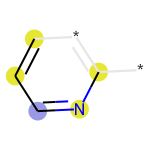

In [156]:
from rdkit import Chem
from rdkit.Chem import AllChem, DataStructs
from rdkit.Chem.Draw import DrawMorganBits, DrawMorganBit
for i in range(dfd.shape[0]):
  mol = Chem.MolFromSmiles(dfd['SMILES'][i]) 
  ECFP_bitinfo = {}
  ECFP = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, bitInfo=ECFP_bitinfo, nBits = 1024)
  bit = 448
  if bit in ECFP_bitinfo.keys():   
    print(i)
    break
DrawMorganBit(mol, bit, ECFP_bitinfo)
# ECFP_tuples = [(mol, bit, ECFP_bitinfo) for bit in list(ECFP_bitinfo.keys())]
# DrawMorganBits(ECFP_tuples, molsPerRow=9, legends=list(map(str, list(ECFP_bitinfo.keys()))), useSVG=True)
